# Supervised Machine Learning - Classification in Titanic dataset

#### This project aims to apply Supervised Machine Learning techniques to the well-known Titanic dataset, predicting passenger survival based on various features such as class, age, gender, and fare. Using Python and popular libraries like pandas, scikit-learn, seaborn, and matplotlib, we preprocess the data, explore feature relationships, and train multiple classification models.

#### Key steps in this project include:

#### Data Exploration & Visualization: Understanding distributions and correlations through histograms, boxplots, and heatmaps.
#### Feature Engineering & Preprocessing: Handling missing values, encoding categorical data, and standardizing features.
#### Model Training & Evaluation: Implementing models such as Logistic Regression, Random Forest, SVM, Gradient Boosting, and K-Nearest Neighbors, evaluating their performance with metrics like accuracy, precision, and recall.
#### Model Selection & Prediction: Choosing the best-performing model and generating predictions for the test dataset.
#### This project provides insights into classification problems, feature selection, and model comparison, serving as a practical example of machine learning in action.

### **Author**: *Matteo Ciccarese*

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


## Libreries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Loading and exploring data

The Titanic dataset on Kaggle is one of the most well-known datasets for machine learning and relates to real passenger data from the RMS Titanic, which sank in 1912. It is primarily used for binary classification problems, as the main goal is to predict whether a passenger survived or not.

### Dataset Structure
The dataset consists of two main files:
- train.csv → Used for model training (includes survival labels).
- test.csv → Used for predictions (does not include survival labels).
### Dataset Features
Each row represents a passenger, with columns providing various details:

* PassengerId → Unique ID for each passenger.
* Survived → Target variable (1 = Survived, 0 = Did not survive).
* Pclass → Ticket class (1st, 2nd, or 3rd class).
* Name → Passenger’s full name.
* Sex → Gender (male/female).
* Age → Age (some missing values).
* SibSp → Number of siblings/spouses aboard.
* Parch → Number of parents/children aboard.
* Ticket → Ticket number.
* Fare → Fare paid for the ticket.
* Cabin → Cabin number (many missing values).
* Embarked → Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')
df_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
df_train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Data preprocessing

In [7]:
df_train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Handling missing values
For df_train **Age, Cabin, and Embarked** columns contain null values. In df_test **Age, Fare and Cabin** have null values.
- For **Age** we create an imputer that will replace the missing values ​​with the median of the column. The median is preferable to the mean to avoid the influence of outliers.
We apply the same transformation of **Age** to df_test, using the median calculated on the train dataset (avoiding data leakage).

- For **Embarked*** We fill the missing values ​​in the column with the most frequent value (mode), since boarding is a categorical variable and the same in df_test.

- For **Fare** in df_test we replace the missing values ​​with the median, avoiding the influence of outliers on ticket prices

- For **Cabin** the missing values ​​are so many that we will simply delete the column.

In [9]:
imputer = SimpleImputer(strategy='median')
df_train.loc[:, 'Age'] = imputer.fit_transform(df_train[['Age']])
df_test.loc[:, 'Age'] = imputer.transform(df_test[['Age']])

df_train.loc[:, 'Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].mode()[0])
df_test.loc[:, 'Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].mode()[0])
df_test.loc[:, 'Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

# Cabin column removal
df_train.drop(columns=['Cabin'], inplace=True)
df_test.drop(columns=['Cabin'], inplace=True)

Machine learning models work with numerical data, so we need to convert categorical variables into numbers.

In [10]:
label_encoder = LabelEncoder()

combined_sex = pd.concat([df_train['Sex'], df_test['Sex']])
label_encoder.fit(combined_sex)

df_train['Sex'] = label_encoder.transform(df_train['Sex'])
df_test['Sex'] = label_encoder.transform(df_test['Sex'])

combined_embarked = pd.concat([df_train['Embarked'], df_test['Embarked']])
label_encoder.fit(combined_embarked)

df_train['Embarked'] = label_encoder.transform(df_train['Embarked'])
df_test['Embarked'] = label_encoder.transform(df_test['Embarked'])


In [11]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,2


In [12]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,2


In [13]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 76.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Nam

## Data Visualization

In order to better visualize the data, which I plan to do for both datasets, we will write a function that we will eventually apply to both datasets.

Data visualization for Train Set


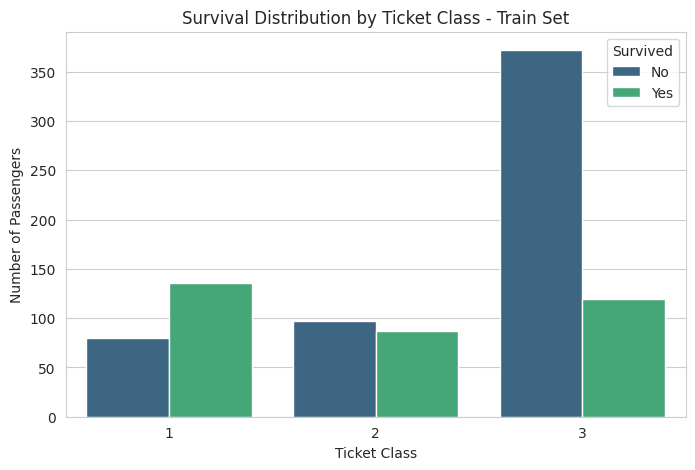

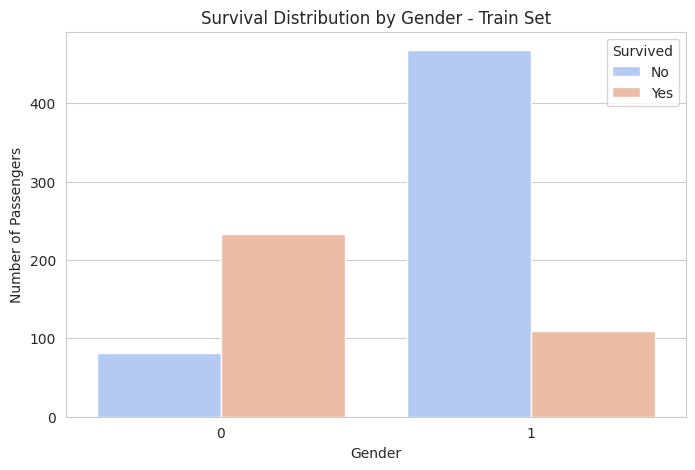

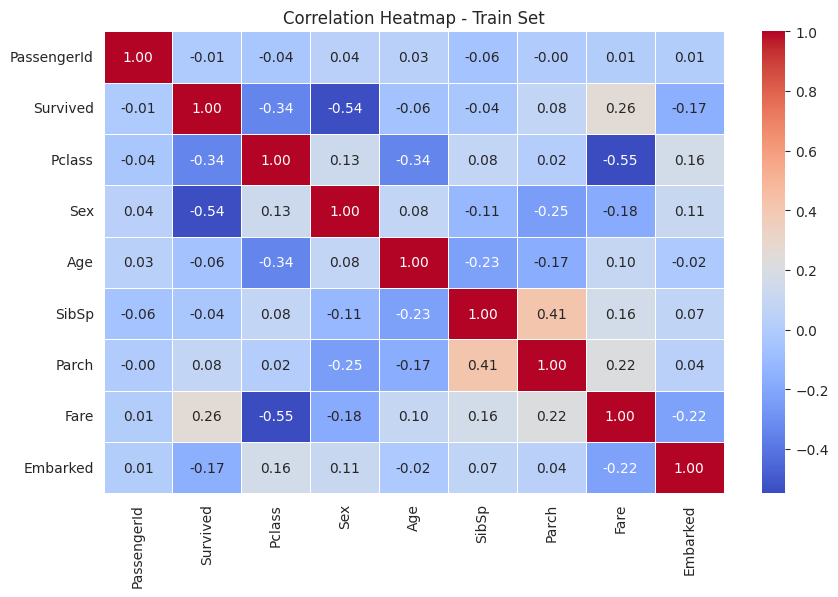

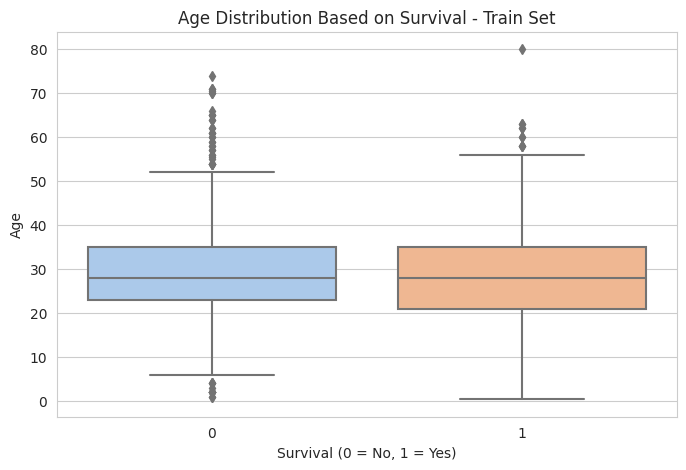

Data visualization for Test Set


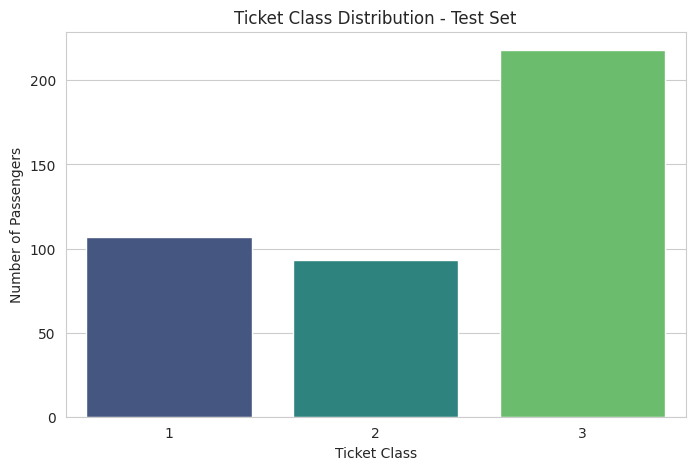

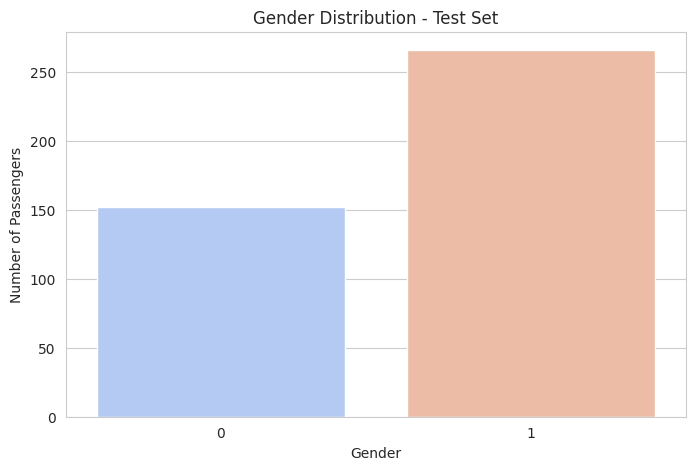

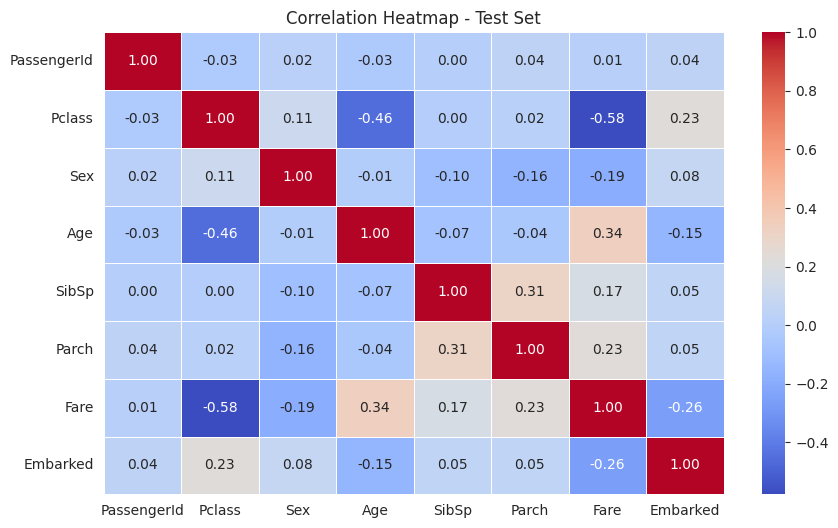

In [14]:
# Set style
sns.set_style("whitegrid")

# Function to visualize data distribution
def plot_data_distribution(df, dataset_name):
    print(f"Data visualization for {dataset_name}")

    # 1️⃣ Bar Chart: Survival by Ticket Class
    plt.figure(figsize=(8,5))
    if 'Survived' in df.columns:
        sns.countplot(data=df, x='Pclass', hue='Survived', palette='viridis')
        plt.title(f"Survival Distribution by Ticket Class - {dataset_name}")
        plt.legend(title="Survived", labels=["No", "Yes"])
    else:
        sns.countplot(data=df, x='Pclass', palette='viridis')
        plt.title(f"Ticket Class Distribution - {dataset_name}")

    plt.xlabel("Ticket Class")
    plt.ylabel("Number of Passengers")
    plt.show()

    # 2️⃣ Bar Chart: Survival by Gender
    plt.figure(figsize=(8,5))
    if 'Survived' in df.columns:
        sns.countplot(data=df, x='Sex', hue='Survived', palette='coolwarm')
        plt.title(f"Survival Distribution by Gender - {dataset_name}")
        plt.legend(title="Survived", labels=["No", "Yes"])
    else:
        sns.countplot(data=df, x='Sex', palette='coolwarm')
        plt.title(f"Gender Distribution - {dataset_name}")

    plt.xlabel("Gender")
    plt.ylabel("Number of Passengers")
    plt.show()

    # 3️⃣ Correlation Matrix Heatmap
    plt.figure(figsize=(10, 6))
    corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
    plt.title(f"Correlation Heatmap - {dataset_name}")
    plt.show()

    # 4️⃣ Boxplot: Age and Survival
    if 'Survived' in df.columns:
        plt.figure(figsize=(8,5))
        sns.boxplot(data=df, x='Survived', y='Age', palette='pastel')
        plt.title(f"Age Distribution Based on Survival - {dataset_name}")
        plt.xlabel("Survival (0 = No, 1 = Yes)")
        plt.ylabel("Age")
        plt.show()

# Apply the function to both datasets
plot_data_distribution(df_train, "Train Set")
plot_data_distribution(df_test, "Test Set")


Considerations from the graphs:
- **Survival Distribution by Ticket Class**: we can see a higher survival rate for the first and second class, to the detriment of the third class.
- **Survival Distribution by Gender**: males (1) have the highest number of deaths compared to females (0)
- **Age Distribution Based on Survival**: there is no correlation between survival and age
- **Correlation Heatmap**: confirms what was said previously, survival is mostly determined by Sex and Pclass.

## Feature Engineering

To help the model understand the impact of family size on survival, we add SibSp (number of siblings/spouses) and Parch (number of parents/children) + 1 (the passenger himself).

In [15]:
# "FamilySize"
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

In [16]:
# Feature selection
features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']
X = df_train[features]
y = df_train['Survived']
X_test_final = df_test[features]

In [17]:
# Division into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

We apply StandardScaler to scale all features, ensuring they have a mean of 0 and a standard deviation of 1.
This is important for models like Logistic Regression and SVM, which perform better with standardized data.

In [18]:
# Feature Standardization
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)  # Standardization of the validation set
X_test_final = scaler.transform(X_test_final)  # Standardization of the final dataset

## Model training and evaluation

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    
    print(f"{name} Accuracy: {acc:.4f}")
    print(classification_report(y_val, y_pred))
    print(confusion_matrix(y_val, y_pred))

Logistic Regression Accuracy: 0.8045
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       105
           1       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

[[90 15]
 [20 54]]
Random Forest Accuracy: 0.8212
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       105
           1       0.79      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[90 15]
 [17 57]]
Support Vector Machine Accuracy: 0.8101
              precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                        

## Conclusion: 

These results show the performance of different machine learning models on the Titanic dataset:

**Logistic Regression** achieved an **accuracy of 80.45%**. It performed well, with a higher recall for non-survivors (86%) compared to survivors (73%), meaning it is better at correctly identifying passengers who did not survive.

**Random Forest** performed slightly better with **82.12% accuracy**. It had a more balanced recall between non-survivors (86%) and survivors (77%), indicating a strong ability to classify both classes.

**Support Vector Machine (SVM)** obtained an **81.01% accuracy**, showing good performance but slightly lower recall for survivors (70%), meaning it misclassified some actual survivors.

**Gradient Boosting** achieved **80.45% accuracy**, similar to Logistic Regression. Its recall for survivors (70%) was slightly lower than Random Forest, suggesting it struggled with some survivor predictions.

**K-Nearest Neighbors (KNN)** had the lowest **accuracy at 78.77%**, with a slightly lower recall for survivors (73%) compared to other models. This suggests KNN may not generalize as well as the other models.


Random Forest is the best-performing model, with the highest accuracy (82.12%) and a good balance between precision and recall.
Logistic Regression and Gradient Boosting performed similarly, while SVM was slightly better than KNN.
KNN had the lowest performance, likely due to sensitivity to feature scaling and the choice of neighbors.

**Based on these results, Random Forest is selected as the best model for predictions on the test dataset.**

In [20]:
best_model = max(models, key=lambda name: accuracy_score(y_val, models[name].predict(X_val)))
print(f"Best model selected: {best_model}")

Best model selected: Random Forest


We now apply the best model to the df_test dataset, to determine whether it survives or not based on the features.

In [21]:
# Predictions on the final test dataset (df_test)
final_model = models[best_model]
y_pred_final = final_model.predict(X_test_final)

submission = pd.DataFrame({'PassengerId': df_test['PassengerId'], 'Survived': y_pred_final})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Thank you!